In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/combined_data_ENGHIN.csv')

In [4]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.dropna(inplace = True)

In [6]:
df['text'].fillna('', inplace=True)

In [7]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [8]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [9]:
x = df['text']
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

# Define the proportions for train, validation, and test sets
train_size = 0.7  # 70% of the data for training
validation_size = 0.15  # 15% for validation
test_size = 0.15  # 15% for testing

# First, split the data into training and the rest
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=1 - train_size, random_state=42)

# Next, split the remaining data into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_size / (test_size + validation_size), random_state=42)

# The data is now split into X_train, y_train (training), X_val, y_val (validation), and X_test, y_test (test)


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer =Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(x_train)

In [13]:
x_train_after = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 1600)
x_val_after = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen = 1600)
x_test_after = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 1600)

In [14]:
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from keras.models import Sequential

In [15]:
model = Sequential([
    Embedding(input_dim = 20000, output_dim = 200, input_length = 1600),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences = True)),
    Bidirectional(LSTM(64, return_sequences = True)),
    GlobalMaxPooling1D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1600, 200)         4000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 1600, 200)         0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 1600, 256)         336896    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 1600, 128)         164352    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                        

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(x_train_after, y_train, batch_size = 50, epochs = 11, validation_data = (x_val_after, y_val))

Epoch 1/11
1033/1033 [==============================] - 425s 395ms/step - loss: 0.1145 - accuracy: 0.9517 - val_loss: 0.0614 - val_accuracy: 0.9790
Epoch 2/11
1033/1033 [==============================] - 359s 348ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.0543 - val_accuracy: 0.9814
Epoch 3/11
1033/1033 [==============================] - 303s 293ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0814 - val_accuracy: 0.9764
Epoch 4/11
1033/1033 [==============================] - 288s 279ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 5/11
1033/1033 [==============================] - 287s 277ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0654 - val_accuracy: 0.9833
Epoch 6/11
1033/1033 [==============================] - 281s 272ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 7/11
1033/1033 [==============================] - 279s 271ms/step - loss: 0.0054 - accuracy: 0.9980 - val_

In [19]:
from keras.models import save_model
save_model(model, 'my_lstmFake_model_intern_1601.h5')

<ipython-input-19-aadaee3b7bd8>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'my_lstmFake_model_intern_1601.h5')


In [20]:
import pickle

with open('history_1601.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [21]:
"""from keras.models import load_model
model = load_model('my_lstmFake_model_intern_1601.h5')"""

"from keras.models import load_model\nmodel = load_model('my_lstmFake_model_intern_1601.h5')"

In [22]:
test_loss, test_accuracy = model.evaluate(x_test_after, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


346/346 [==============================] - 28s 82ms/step - loss: 0.0867 - accuracy: 0.9838
Test Loss: 0.08672378212213516
Test Accuracy: 0.9838258028030396


In [23]:
predictions = model.predict(x_test_after)


346/346 [==============================] - 29s 78ms/step


In [24]:
import matplotlib.pyplot as plt

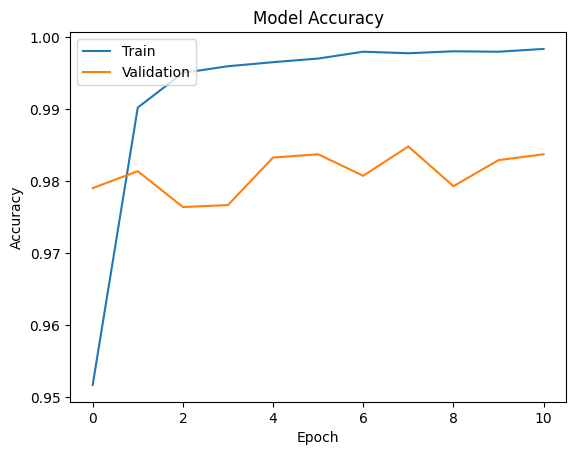

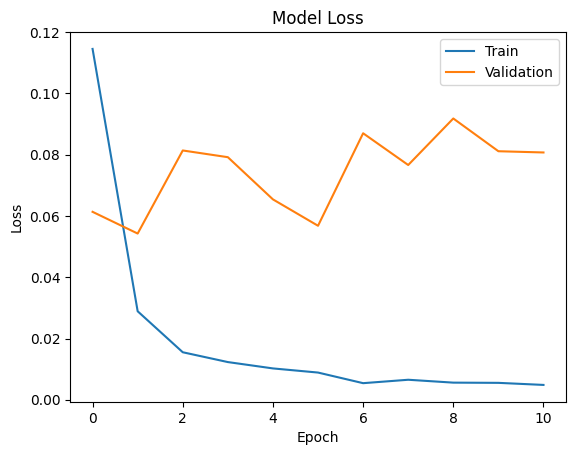

In [25]:
try:
    with open('history_1601.pkl', 'rb') as file:
        training_history = pickle.load(file)

    # Plot the accuracy curve
    plt.plot(training_history['accuracy'])
    plt.plot(training_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot the loss curve
    plt.plot(training_history['loss'])
    plt.plot(training_history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

except FileNotFoundError:
    print("Training history file not found. Make sure you saved it during training.")

In [26]:
from google.colab import files
files.download('history_1601.pkl')
files.download('my_lstmFake_model_intern_1601.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
predictions

array([[9.9949670e-01],
       [3.4166650e-10],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [6.0704814e-08]], dtype=float32)

In [28]:
threshold = 0.5
lstm_binary_predictions = (predictions >= threshold).astype(int)

In [29]:
lstm_binary_predictions

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [31]:
accuracy = accuracy_score(y_test, lstm_binary_predictions)

In [32]:
recall = recall_score(y_test, lstm_binary_predictions)
precision = precision_score(y_test, lstm_binary_predictions)
f1Score = f1_score(y_test, lstm_binary_predictions)

In [33]:
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1Score)

Accuracy:  0.9838257883798681
Precision: 0.9834799784521459
Recall: 0.9843637670740475
F1 Score: 0.9839216743016258


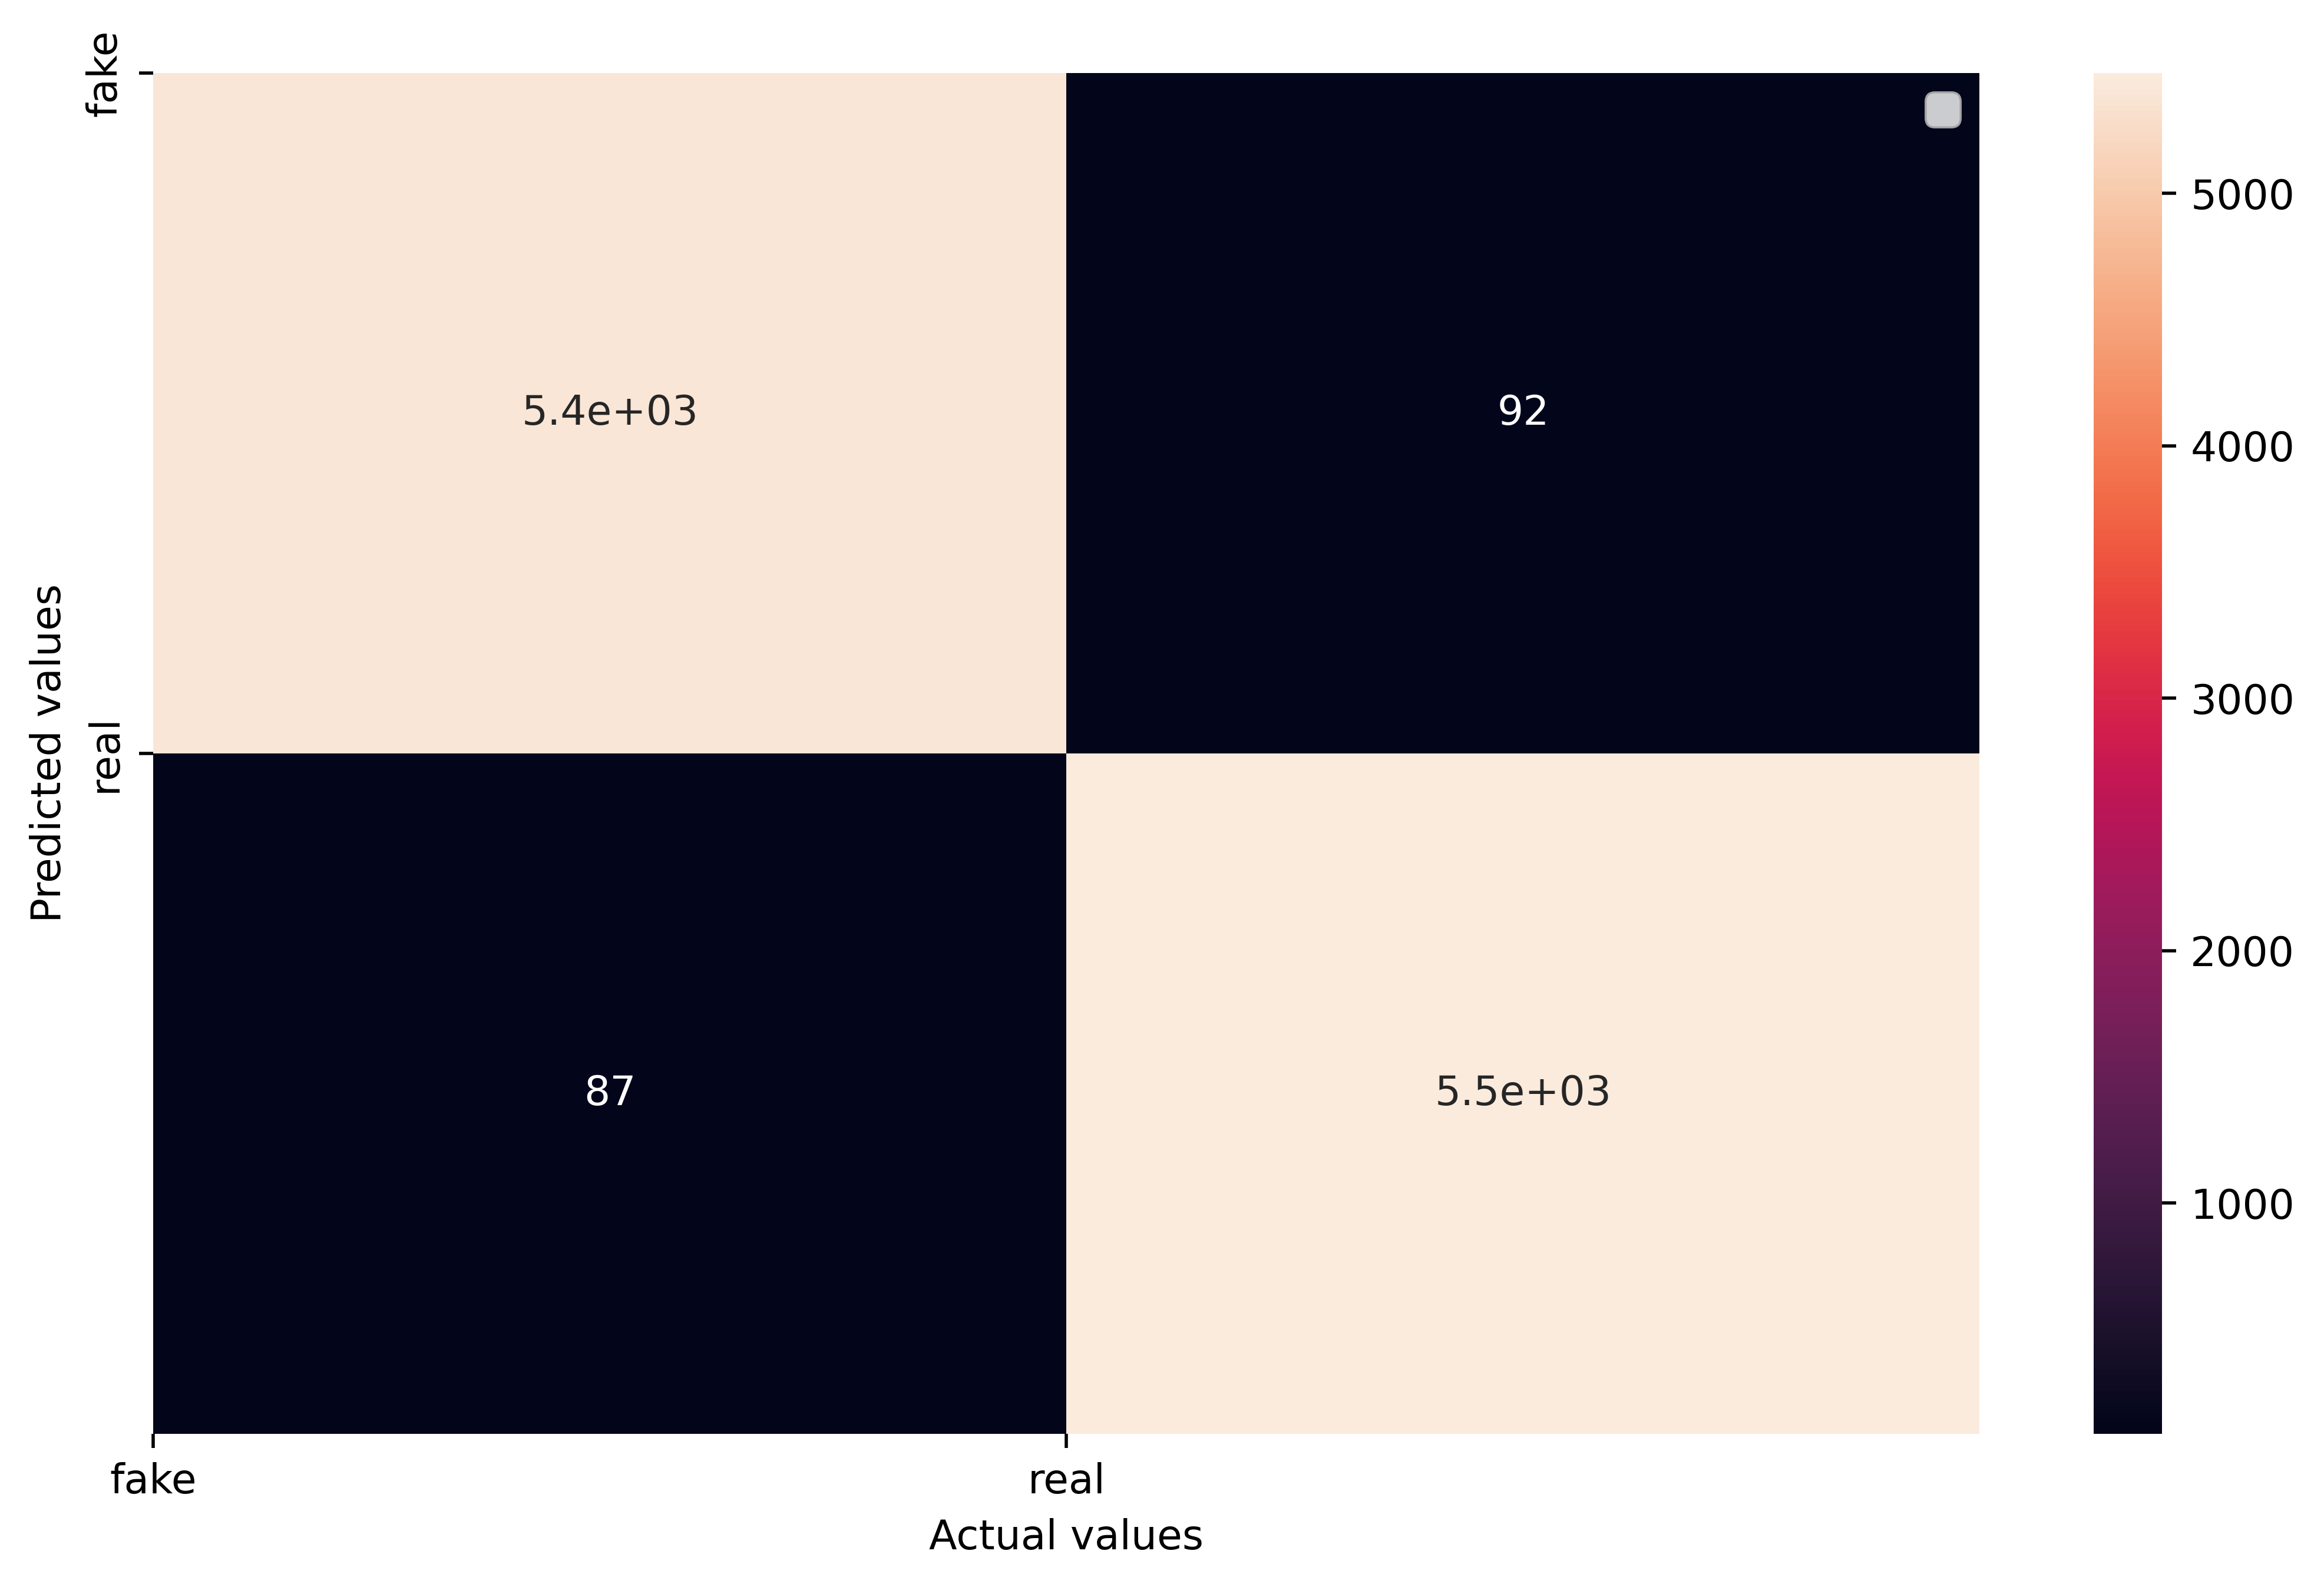

In [34]:
import seaborn as sns
cm_rf = confusion_matrix(y_test, lstm_binary_predictions)
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm_rf, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

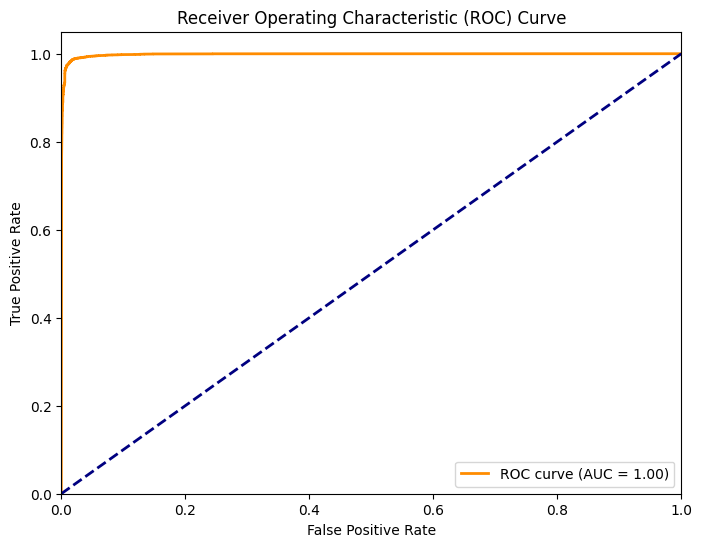

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
